In [1]:
import numpy as np
import matplotlib.pyplot as plt

import drawing_ops as ops
from solver import solve_poisson
from utils import *

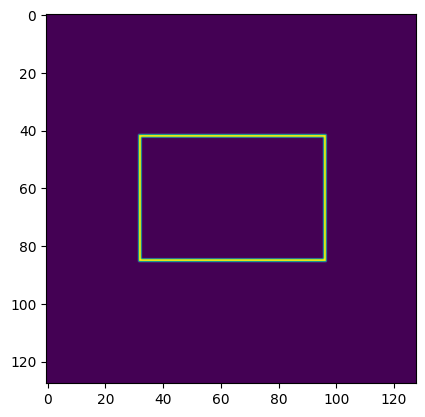

In [2]:
# Variant 1: Draw directly to a grid
N = 128
U = np.zeros((N, N))

U = ops.rectangle(U, center=(N/2, N/2), wh=[N/2, N/3])
plt.imshow(U)

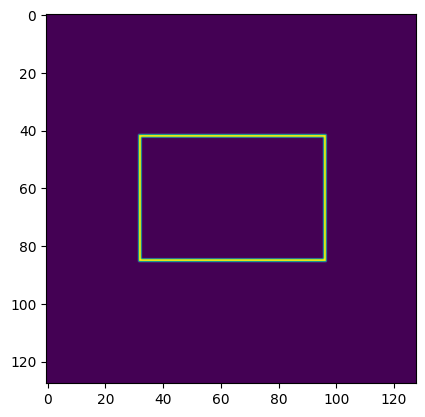

In [3]:
# Variant 2: Define a function that draws to a grid
N = 128
U = np.zeros((N, N))

rect = ops.rectangle(center=(N/2, N/2), wh=[N/2, N/3])
U = rect(U)
plt.imshow(U)

![ops](docs/poisson-ops3.png)

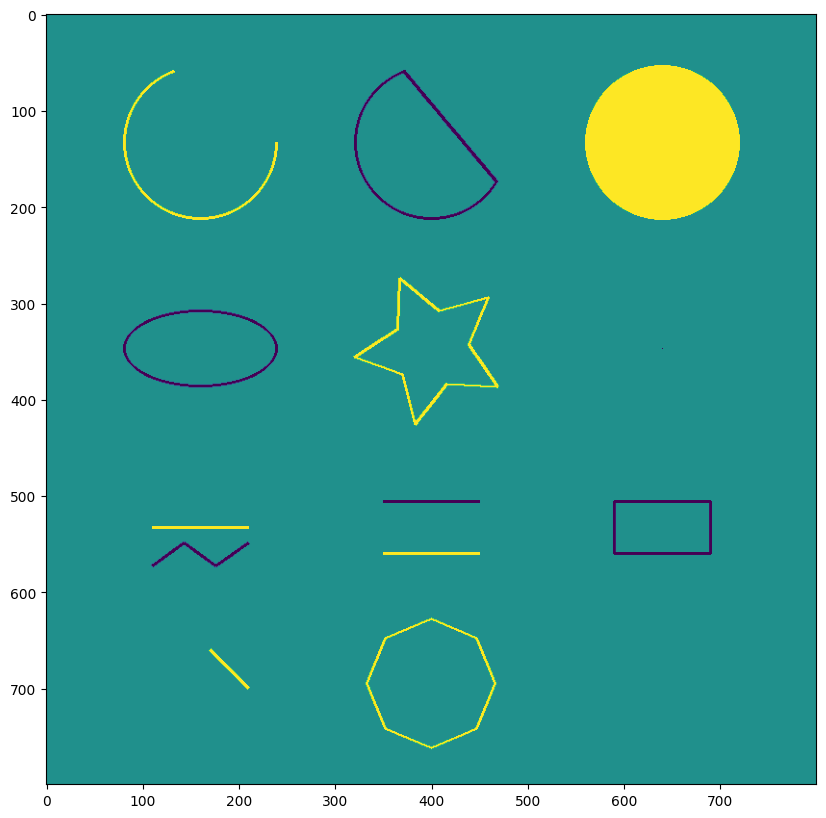

In [4]:
N = 800
U = np.zeros((N, N))
all_obs = ops.composition(
    ops.arc(center=(N/5, N/6), radius=N/10, end=250, width=3),
    ops.chord(center=(N/2, N/6), radius=N/10, start=30, end=250, width=3, value=-5),
    ops.circle(center=(2.4*N/3, N/6), radius=N/10, filled=True, value=10),
    
    ops.ellipse(center=(N/5, N/2.3), radii=(N/10, N/20), width=3, value=-10),
    ops.star(center=(N/2, N/2.3), ro=N/10, ri=N/20, n_corners=5, width=3, rotation=30),
    ops.point(xy=(2.4*N/3, N/2.3), value=-1),
    
    ops.line(center=(N/5, N/1.5), length=N/8, width=3),
    ops.line(xy=[N/5-N/16, N/1.5+N/20,
                 N/5-N/48, N/1.5+N/50, 
                 N/5+N/48, N/1.5+N/20, 
                 N/5+N/16, N/1.5+N/50
                 ], width=3, value=-1),
    ops.plate_capacitor(center=(N/2, N/1.5), length=N/8, distance=N/15, plate_width=3, values=[-5, 5]),
    ops.rectangle(center=(2.4*N/3, N/1.5), wh=(N/8, N/15), width=3, value=-5),

    ops.polygon(offset=(N/5, N/1.25), xy=[10, 20, 30, 40, 50, 60], width=5),
    ops.regular_polygon(center=(N/2, N/1.15), radius=N/12, n_sides=8, width=3, value=5),
)
U = all_obs(U)
plt.figure(figsize=(10, 10))
plt.imshow(np.sign(U), interpolation=None)

In [5]:
phi = solve_poisson(U)
E = get_E_abs(phi)

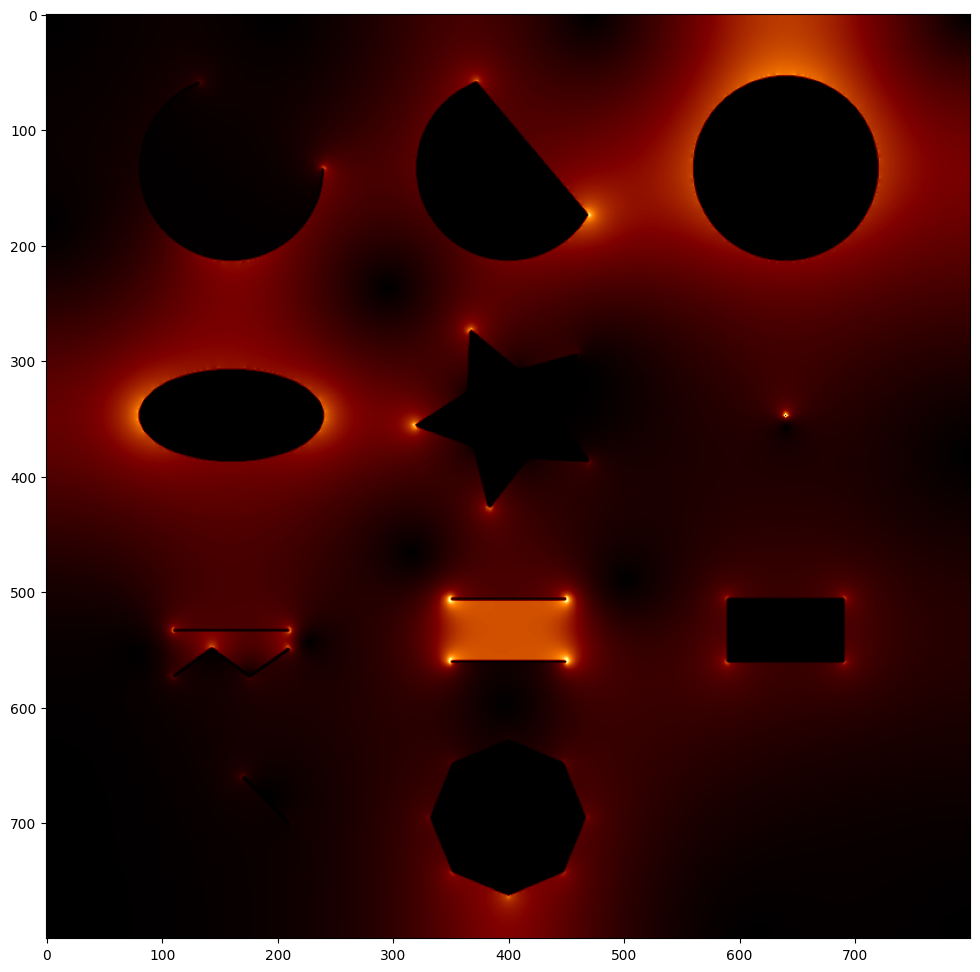

In [6]:
plt.figure(figsize=(12, 12))
plt.imshow(E, cmap='afmhot')